In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("/home/hero576/code/python/lane/data/001.jpg")

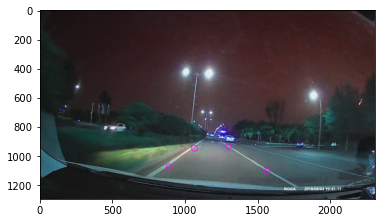

In [3]:
pts_src = np.array([(888, 1075), (1062, 948), (1296, 935), (1561, 1105)], dtype=float)
for p in pts_src:
    p = [int(i) for i in p]
    cv2.circle(img,tuple(p),20,(255,0,255),3)
plt.imshow(img)

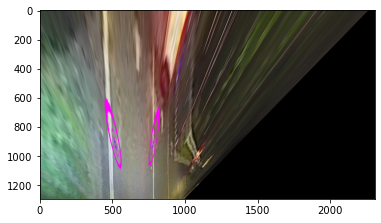

In [75]:
size = img.shape
dst_points = np.array(
    [
        [size[0]*0.4,size[1]*0.6],
        [size[0]*0.4, size[1]*0.4],
        [size[0]*0.6, size[1]*0.4],
        [size[0]*0.6, size[1]*0.6]
    ], dtype=float
)
h, status = cv2.findHomography(pts_src, dst_points)
ipm_out = cv2.warpPerspective(img, h, size[1::-1], flags=cv2.INTER_LINEAR)
plt.imshow(ipm_out)

In [17]:
h

array([[-1.62287218e-01, -6.66186766e-01,  7.65363271e+02],
       [-1.42480500e-01, -1.64846610e+00,  1.64556094e+03],
       [-1.11263056e-04, -1.00861291e-03,  1.00000000e+00]])

In [18]:
h_, status = cv2.findHomography(dst_points, pts_src)
h_

array([[ 6.52809644e-02, -6.12772973e-01,  9.58391620e+02],
       [-2.35273140e-01, -4.46858183e-01,  9.15401794e+02],
       [-2.30036167e-04, -5.18885925e-04,  1.00000000e+00]])

In [19]:
h_*h

array([[-1.05942661e-02,  4.08221246e-01,  7.33517745e+05],
       [ 3.35218346e-02,  7.36630567e-01,  1.50634944e+06],
       [ 2.55945268e-08,  5.23355043e-07,  1.00000000e+00]])

In [62]:
np.array((888, 1075,1)).T*h[0]

array([-144.11104959, -716.15077381,  765.36327099])

In [76]:
np.array((1062, 948,1)).T*h[0]

array([-172.34902552, -631.54505448,  765.36327099])

In [95]:
for p in pts_src:
    p =np.insert(p,2,1)
    print(p*h[0])

[-144.11104959 -716.15077381  765.36327099]
[-172.34902552 -631.54505448  765.36327099]
[-210.32423453 -622.88462652  765.36327099]
[-253.33034731 -736.1363768   765.36327099]


In [117]:
def cvt_point(points,cvt_mat_t):
    u,v = points
    cvt_mat_t = h
    x = (cvt_mat_t[0][0]*u+cvt_mat_t[0][1]*v+cvt_mat_t[0][2])/(cvt_mat_t[2][0]*u+cvt_mat_t[2][1]*v+cvt_mat_t[2][2])
    y = (cvt_mat_t[1][0]*u+cvt_mat_t[1][1]*v+cvt_mat_t[1][2])/(cvt_mat_t[2][0]*u+cvt_mat_t[2][1]*v+cvt_mat_t[2][2])
    return x,y

In [118]:
for p in pts_src:
    print(cvt_point(p,h))

(518.4000244140618, 1382.4000244140602)
(518.400024414063, 921.5999755859311)
(777.5999755859375, 921.5999755859332)
(777.5999755859376, 1382.4000244140616)


In [113]:
cvt_mat_t[0][0]

-0.16228721800535864

In [119]:
dst_points

array([[ 518.4, 1382.4],
       [ 518.4,  921.6],
       [ 777.6,  921.6],
       [ 777.6, 1382.4]])

# 透视变换

[[888, 1075, 1062, 948, 1296, 935, 1561, 1105]]
(880, 1074)


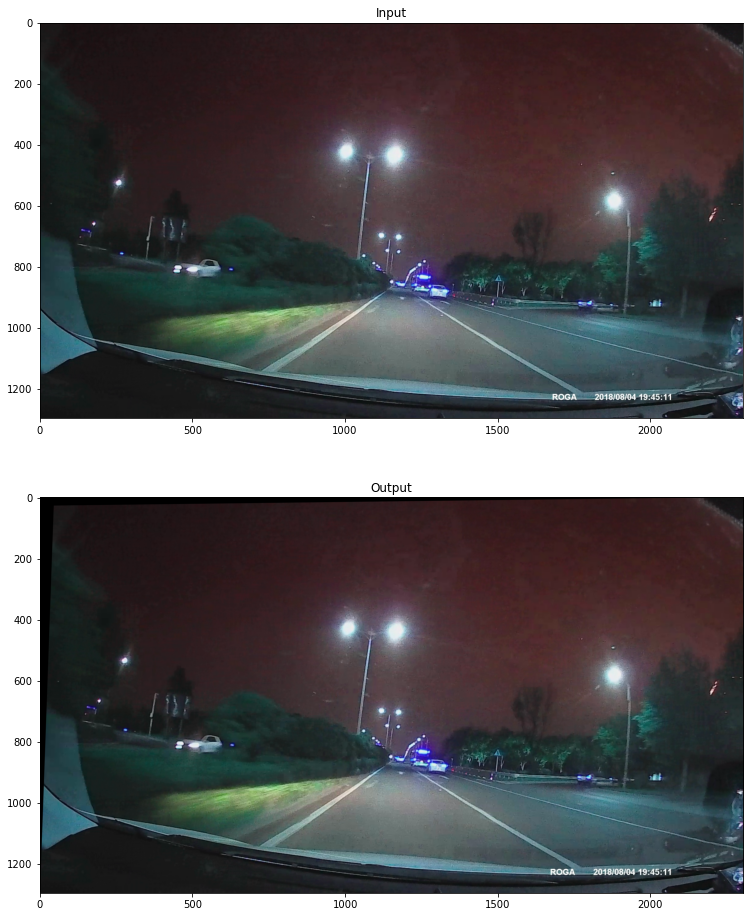

In [109]:
import cv2
import math

import random
import numpy as np
import matplotlib.pyplot as plt

# 坐标转换核心代码如下
def cvt_pos(pos,cvt_mat_t):
    u = pos[0]
    v = pos[1]
    x = (cvt_mat_t[0][0]*u+cvt_mat_t[0][1]*v+cvt_mat_t[0][2])/(cvt_mat_t[2][0]*u+cvt_mat_t[2][1]*v+cvt_mat_t[2][2])
    y = (cvt_mat_t[1][0]*u+cvt_mat_t[1][1]*v+cvt_mat_t[1][2])/(cvt_mat_t[2][0]*u+cvt_mat_t[2][1]*v+cvt_mat_t[2][2])
    return (int(x),int(y))


def perspective_transformation(Image, total_points_list):
    '''透视变换'''
    h, w, ch = Image.shape  # 获取行数（高）和列数（宽）
    # 原图四个角坐标
    p1 =np1= [0, 0]  # 左上
    p2 = np2=[w - 1, 0]  # 右上
    p3 =np3= [w - 1, h - 1]  # 右下
    p4 = np4= [0, h - 1]  # 左下
    pts1 = np.float32([p1, p2, p3, p4])
    np_list = [np1, np2, np3, np4]
    # print('原来的四角坐标:%s' % np_list)
    # 期望得到的图四角坐标,随机一个或多个角坐标变换,可能是放大也可能是缩小
    for i in range(0, random.randint(1, 4)):
        np_list[i][0] = np_list[i][0] + random.randint(0, 50)
        np_list[i][1] = np_list[i][1] + random.randint(0, 50)

    # print('指定透视变换后四角坐标:%s' % np_list)
    nw = max(np1[0], np2[0], np3[0], np4[0])
    nh = max(np1[1], np2[1], np3[1], np4[1])
    pts2 = np.float32([np1, np2, np3, np4])
    # 获得透视变换矩阵
    M = cv2.getPerspectiveTransform(pts1, pts2)
    # print('M:%s' %M) # 3行3列
    # 应用
    dst = cv2.warpPerspective(Image, M, (nw, nh))
    total_points_list = get_points_tran(total_points_list, M)
    # print('变换后的四角坐标:%s' % get_points_tran([p1+p2+p3+p4], M))
    return dst, total_points_list


def get_points_tran(points_list, M):
    '''透视变换坐标转换'''
    for i in points_list:
        print(cvt_pos([i[0],i[1]],M))
        i[0],i[1] = cvt_pos([i[0],i[1]],M)
        i[2],i[3] = cvt_pos([i[2],i[3]],M)
        i[4],i[5] = cvt_pos([i[4],i[5]],M)
        i[6],i[7] = cvt_pos([i[6],i[7]],M)
    return points_list

image = cv2.imread('/home/hero576/code/python/lane/data/001.jpg')
# 图片原来的固有字段的坐标及值
# points_list = []
# with open('../myimages/gt_5.txt', 'r', encoding='utf-8') as f:
#     for line in f.readlines():
#         # 获取前8个元素，也就是四点坐标，后面的是文本内容，可以不用变
#         data_line = line.split(',')
#         # 将列表中坐标元素变成int
#         data = [int(i) if data_line.index(i) <= 7 else i for i in data_line]
#         points_list.append(data)
points_list = [[888, 1075, 1062, 948, 1296, 935, 1561, 1105]]


print(points_list)
# 调用透视变换函数
new_image,points_list = perspective_transformation(image,points_list)

# 也可以在窗口查看效果
plt.figure(figsize=(16,16))
plt.subplot(211), plt.imshow(image), plt.title('Input')
plt.subplot(212), plt.imshow(new_image), plt.title('Output')
plt.show()

In [106]:
a,b = (888, 1075)

In [ ]:
cvt_pos([i[0],i[1]],M)

In [128]:

import cv2
import numpy as np
import sys
 
img = cv2.imread('data/lane_night.jpg')
# cv2.imshow("original", img)
 
# 可选，扩展图像，保证内容不超出可视范围
img = cv2.copyMakeBorder(img, 200, 200, 200, 200, cv2.BORDER_CONSTANT, 0)
w, h = img.shape[0:2]
 
anglex = 0
angley = 30
anglez = 0  # 是旋转
fov = 42
r = 0
 
def rad(x):
    return x * np.pi / 180
 
def get_warpR():
    global anglex,angley,anglez,fov,w,h,r
    # 镜头与图像间的距离，21为半可视角，算z的距离是为了保证在此可视角度下恰好显示整幅图像
    z = np.sqrt(w ** 2 + h ** 2) / 2 / np.tan(rad(fov / 2))
    # 齐次变换矩阵
    rx = np.array([[1, 0, 0, 0],
                   [0, np.cos(rad(anglex)), -np.sin(rad(anglex)), 0],
                   [0, -np.sin(rad(anglex)), np.cos(rad(anglex)), 0, ],
                   [0, 0, 0, 1]], np.float32)
 
    ry = np.array([[np.cos(rad(angley)), 0, np.sin(rad(angley)), 0],
                   [0, 1, 0, 0],
                   [-np.sin(rad(angley)), 0, np.cos(rad(angley)), 0, ],
                   [0, 0, 0, 1]], np.float32)
 
    rz = np.array([[np.cos(rad(anglez)), np.sin(rad(anglez)), 0, 0],
                   [-np.sin(rad(anglez)), np.cos(rad(anglez)), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]], np.float32)
 
    r = rx.dot(ry).dot(rz)
 
    # 四对点的生成
    pcenter = np.array([h / 2, w / 2, 0, 0], np.float32)
 
    p1 = np.array([0, 0, 0, 0], np.float32) - pcenter
    p2 = np.array([w, 0, 0, 0], np.float32) - pcenter
    p3 = np.array([0, h, 0, 0], np.float32) - pcenter
    p4 = np.array([w, h, 0, 0], np.float32) - pcenter
 
    dst1 = r.dot(p1)
    dst2 = r.dot(p2)
    dst3 = r.dot(p3)
    dst4 = r.dot(p4)
 
    list_dst = [dst1, dst2, dst3, dst4]
 
    org = np.array([[0, 0],
                    [w, 0],
                    [0, h],
                    [w, h]], np.float32)
 
    dst = np.zeros((4, 2), np.float32)
 
    # 投影至成像平面
    for i in range(4):
        dst[i, 0] = list_dst[i][0] * z / (z - list_dst[i][2]) + pcenter[0]
        dst[i, 1] = list_dst[i][1] * z / (z - list_dst[i][2]) + pcenter[1]
 
    warpR = cv2.getPerspectiveTransform(org, dst)
    return warpR
 
def control():
    global anglex,angley,anglez,fov,r
 
    # 键盘控制
    if 27 == c:  # Esc quit
        cv2.destroyAllWindows()        
        sys.exit()
    if c == ord('w'):
        anglex += 1
    if c == ord('s'):
        anglex -= 1
    if c == ord('a'):
        angley += 1
        print(angley)
        # dx=0
    if c == ord('d'):
        angley -= 1
    if c == ord('u'):
        anglez += 1
    if c == ord('p'):
        anglez -= 1
    if c == ord('t'):
        fov += 1
    if c == ord('r'):
        fov -= 1
    if c == ord(' '):
        anglex = angley = anglez = 0
    if c == ord('e'):
        print("======================================")
        print('Rotation Matrix:')
        print(r)
        print('angle alpha(anglex):')
        print(anglex)
        print('angle beta(angley):')
        print(angley)
        print('dz(anglez):')
        print(anglez)
 
 
while True:
    warpR = get_warpR()
    result = cv2.warpPerspective(img, warpR, (h, w))
    cv2.namedWindow('result',2)
    cv2.imshow("result", result)
    c = cv2.waitKey(30)
    control()

SystemExit: 

In [127]:
cv2.destroyAllWindows()